In [88]:
import pandas as pd
import numpy as np

df = pd.read_csv('tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [90]:
#date is of 'object' type, so needs to be converted into datetime format in order to be processed further

In [91]:
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)

In [92]:
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [93]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2193 non-null   datetime64[ns]
 1   Open       2193 non-null   float64       
 2   High       2193 non-null   float64       
 3   Low        2193 non-null   float64       
 4   Close      2193 non-null   float64       
 5   Adj Close  2193 non-null   float64       
 6   Volume     2193 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 120.1 KB


In [94]:
#verify changes calling head and info 

In [95]:
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.929668,0.930309,0.929273,0.929903,0.929903,0.424967
Open,0.929668,1.000000,0.999578,0.999566,0.999054,0.999054,0.457938
High,0.930309,0.999578,1.000000,0.999490,0.999631,0.999631,0.466999
Low,0.929273,0.999566,0.999490,1.000000,0.999580,0.999580,0.448387
Close,0.929903,0.999054,0.999631,0.999580,1.000000,1.000000,0.458157
Adj Close,0.929903,0.999054,0.999631,0.999580,1.000000,1.000000,0.458157
Volume,0.424967,0.457938,0.466999,0.448387,0.458157,0.458157,1.000000


In [96]:
#apart from volume, the features are highly correlated (expected)

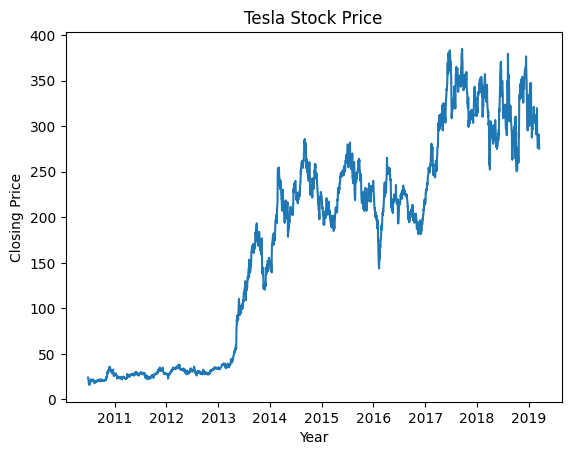

In [97]:
import matplotlib.pyplot as plt

plt.plot(df['Date'],df['Close'])

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Price')

plt.show()

In [98]:
#gauge overall trend of the stock price

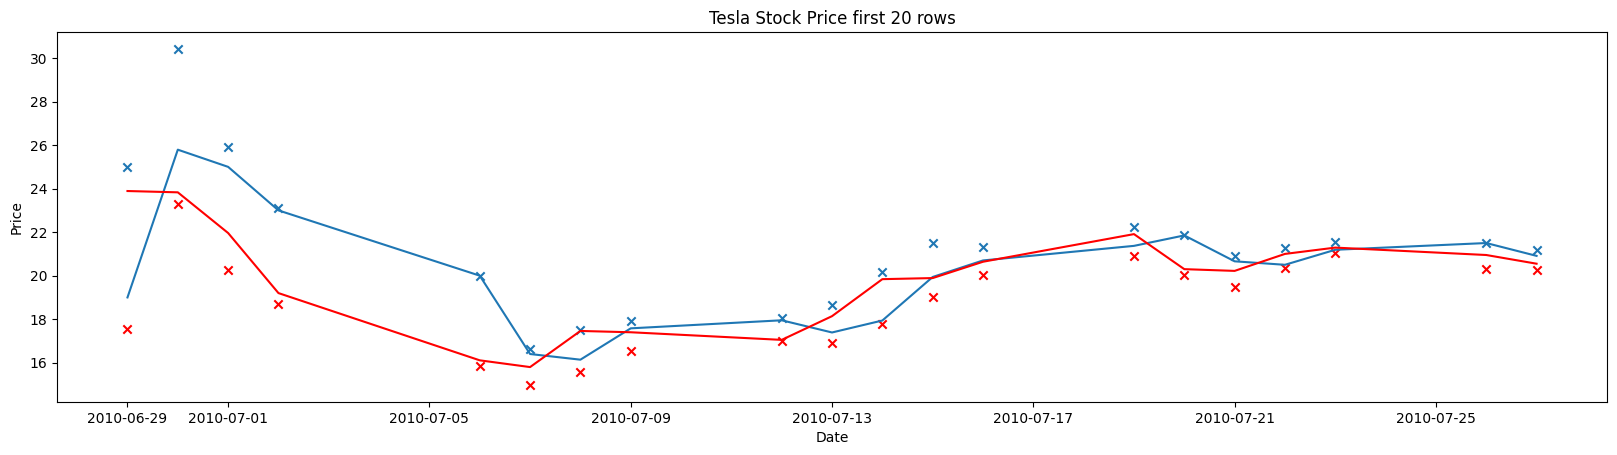

In [99]:
first=df.head(20)
plt.figure().set_figwidth(20)

plt.plot(first['Date'],first['Open'])
plt.plot(first['Date'],first['Close'],color='red')

plt.scatter(first['Date'],first['High'],marker='x')
plt.scatter(first['Date'],first['Low'],marker='x',color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Price first 20 rows')

plt.show()

In [100]:
#examine first 20 rows of dataset
#I quickly noticed that the stock price wasn't recorded in linear intervals
#therefore, is was better to use the day number on the x axis

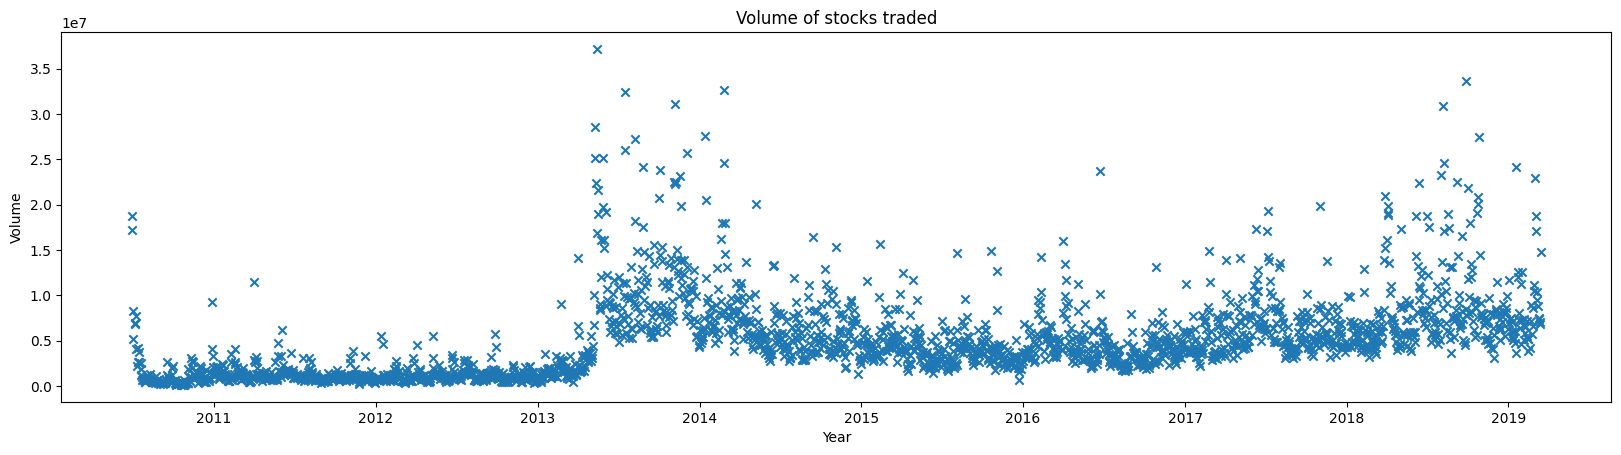

In [101]:
plt.figure().set_figwidth(20)
plt.scatter(df['Date'],df['Volume'],marker='x')

plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume of stocks traded')

plt.show()

In [102]:
#the correlation between date and volume isn't strong as mentioned above
#there is not a large overall increase like there is with closing price- it does not mirror that trend

In [103]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


In [104]:
from sklearn.model_selection import train_test_split
X = np.array(df.index).reshape(-1,1)
y=df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print("R2 Score: ",score*100,"%")

R2 Score:  86.56647529607051 %


In [106]:
#I tested different sizes of training/testing data. 
#setting the test data to between 15 and 40% produced an r2 score of between 86-87%

Text(0.5, 1.0, 'Tesla Stock Price')

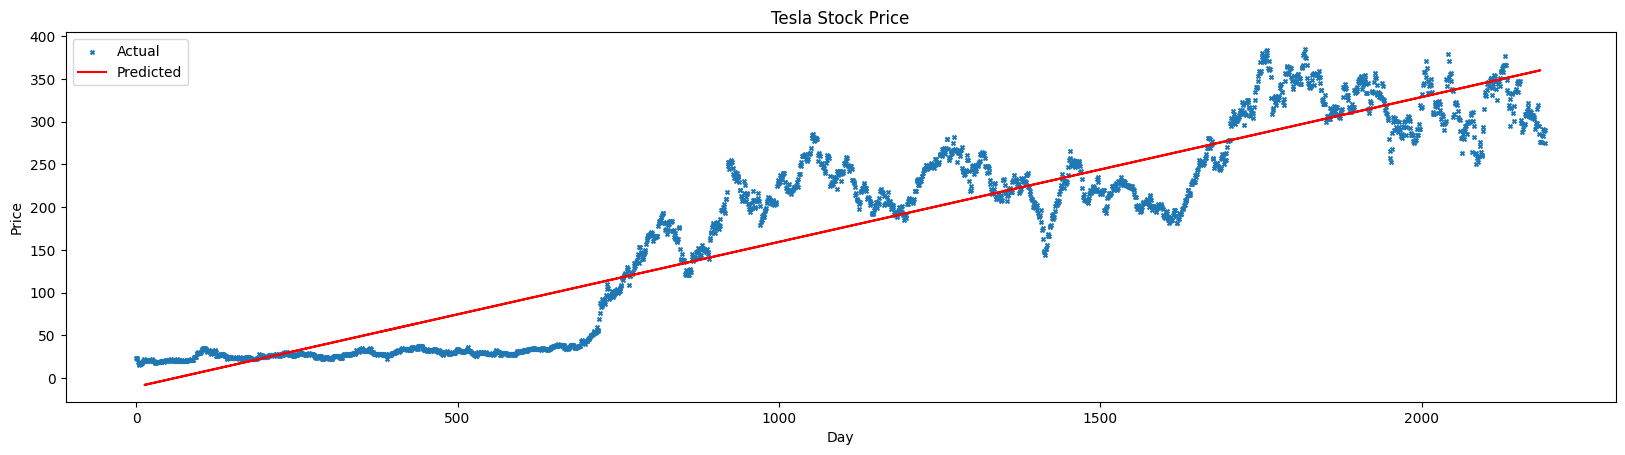

In [107]:
plt.figure().set_figwidth(20)

plt.scatter(X,y,8,marker='x',label="Actual")
plt.plot(X_test,y_pred,color='red',label='Predicted')

plt.legend(loc="upper left")

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Tesla Stock Price')

In [108]:
#Linear regression is a basic model. It just captures the overall trend of the dataset
#Using LSTM, a more complex algorithm, will improve the accuracy of the predictions

In [109]:
trainingPortion=df.iloc[:1754]
testData=df.iloc[-439:]

In [110]:
#1754 is roughly 80% of dataset

In [111]:
trainingPortion.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1749,2017-06-09,374.420013,376.869995,354.799988,357.320007,357.320007,17261400
1750,2017-06-12,357.989990,364.500000,350.619995,359.010010,359.010010,10517700
1751,2017-06-13,367.619995,376.000000,366.609985,375.950012,375.950012,11807900
1752,2017-06-14,381.089996,384.250000,376.309998,380.660004,380.660004,12818400
1753,2017-06-15,372.500000,375.459991,366.489990,375.339996,375.339996,10426500


In [112]:
testData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1754,2017-06-16,377.980011,378.010010,370.100006,371.399994,371.399994,6731000
1755,2017-06-19,375.000000,376.700012,367.799988,369.799988,369.799988,6549300
1756,2017-06-20,376.670013,378.880005,369.730011,372.239990,372.239990,7438700
1757,2017-06-21,374.350006,376.989990,368.019989,376.399994,376.399994,4923200
1758,2017-06-22,377.989990,385.000000,373.570007,382.609985,382.609985,7529800


In [113]:
trainData=trainingPortion.iloc[:,4:5].values #get close values
trainData

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [375.950012],
       [380.660004],
       [375.339996]])

In [114]:
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #convert close to a numeric format
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

C:\Users\gbpak\AppData\Local\Temp\ipykernel_23412\2937153912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #convert close to a numeric format


In [ ]:
#section off test data

In [115]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1754, 1)

In [116]:
#scale the data to values between 0 and 1
#should help improve algorithm performance by reducing feature dominance

In [117]:
X_train = []
y_train = []

for i in range (60,1149): #1149 is the length of the training set
    X_train.append(trainData[i-60:i,0]) #extract 60 data points
    y_train.append(trainData[i,0]) #target label is data at current index

X_train,y_train = np.array(X_train),np.array(y_train)

In [118]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) 
X_train.shape

(1089, 60, 1)

In [119]:
#reshape X_train to add extra dimension for input features (60)

In [120]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

C:\Users\gbpak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [121]:
#4 layer sequential model with 100 units per layer
#use dropouts on each layer to prevent overfitting
#using adam optimizer for fast convergence

In [122]:
model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 8s - 234ms/step - loss: 0.0118
Epoch 2/20
35/35 - 3s - 82ms/step - loss: 0.0018
Epoch 3/20
35/35 - 3s - 81ms/step - loss: 0.0020
Epoch 4/20
35/35 - 3s - 82ms/step - loss: 0.0016
Epoch 5/20
35/35 - 3s - 81ms/step - loss: 0.0016
Epoch 6/20
35/35 - 3s - 81ms/step - loss: 0.0016
Epoch 7/20
35/35 - 3s - 84ms/step - loss: 0.0016
Epoch 8/20
35/35 - 3s - 79ms/step - loss: 0.0026
Epoch 9/20
35/35 - 3s - 81ms/step - loss: 0.0016
Epoch 10/20
35/35 - 3s - 82ms/step - loss: 0.0014
Epoch 11/20
35/35 - 3s - 80ms/step - loss: 0.0014
Epoch 12/20
35/35 - 3s - 84ms/step - loss: 0.0015
Epoch 13/20
35/35 - 3s - 86ms/step - loss: 0.0017
Epoch 14/20
35/35 - 3s - 95ms/step - loss: 0.0014
Epoch 15/20
35/35 - 3s - 82ms/step - loss: 0.0012
Epoch 16/20
35/35 - 3s - 82ms/step - loss: 0.0011
Epoch 17/20
35/35 - 3s - 79ms/step - loss: 0.0018
Epoch 18/20
35/35 - 3s - 80ms/step - loss: 0.0011
Epoch 19/20
35/35 - 3s - 80ms/step - loss: 0.0010
Epoch 20/20
35/35 - 3s - 80ms/step - loss: 0.0012


In [123]:
#fit model

In [124]:
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape #convert testData to array and scale

X_test = []
length = len(testData)
for i in range(60,length):  #add sequence of 60 data points to testData
    X_test.append(inputClosing_scaled[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape #reshape into reqd format

(379, 60, 1)

In [125]:
y_pred=model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [126]:
y_pred = sc.inverse_transform(y_pred) 

In [ ]:
#transform back to original values for plotting

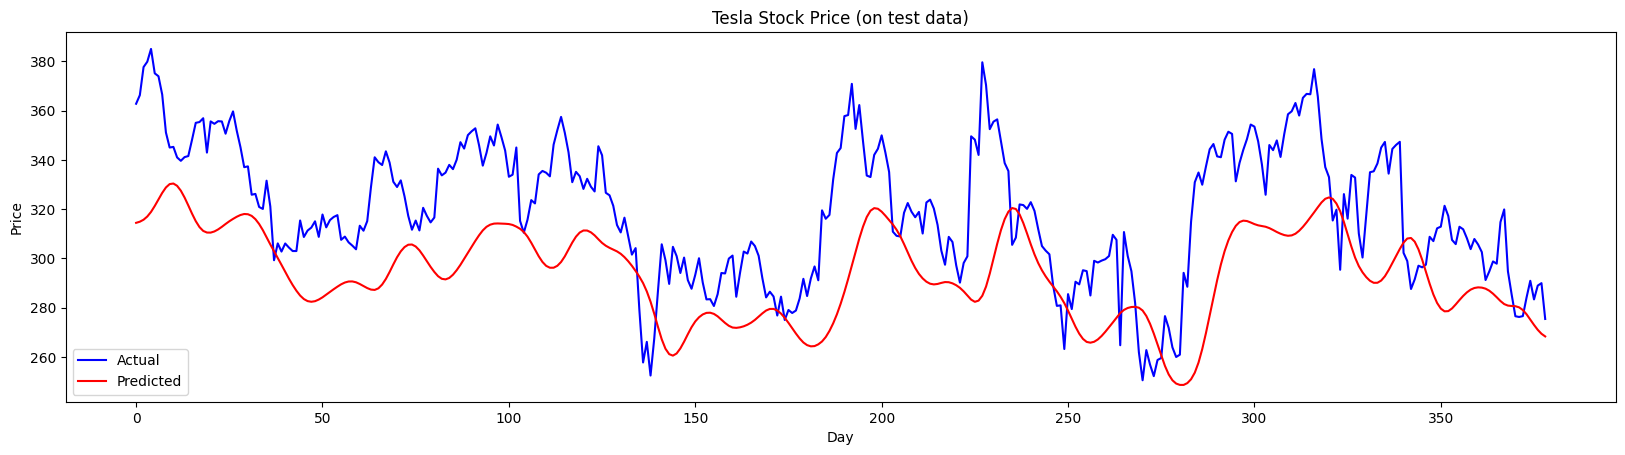

In [135]:
plt.figure().set_figwidth(20)

plt.plot(y_test, color = 'blue',label='Actual')
plt.plot(y_pred, color = 'red',label='Predicted')

plt.legend(loc="lower left")

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Tesla Stock Price (on test data)')

plt.show()

In [ ]:
#the general trend of the test data is predicted accurately. A possibilty as to why the predicted curve is of a lower price
#is because there is a sudden spike at the start of the period. The model will have been trained on many spikes previously,
#any may think that it has already reached the maximum price